# Credit Card Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.naive_bayes import GaussianNB
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler, TomekLinks
from xgboost import XGBClassifier
from sklearn import tree
from collections import Counter
import graphviz

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report, roc_curve
from sklearn import metrics

# A) Dataset Information

In [2]:
df = pd.read_csv('creditcard dataset.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
df.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [4]:
df.duplicated().sum()

1081

In [5]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

In [6]:
df.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [7]:
df['Class'].value_counts()

0    283253
1       473
Name: Class, dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 283726 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    283726 non-null  float64
 1   V1      283726 non-null  float64
 2   V2      283726 non-null  float64
 3   V3      283726 non-null  float64
 4   V4      283726 non-null  float64
 5   V5      283726 non-null  float64
 6   V6      283726 non-null  float64
 7   V7      283726 non-null  float64
 8   V8      283726 non-null  float64
 9   V9      283726 non-null  float64
 10  V10     283726 non-null  float64
 11  V11     283726 non-null  float64
 12  V12     283726 non-null  float64
 13  V13     283726 non-null  float64
 14  V14     283726 non-null  float64
 15  V15     283726 non-null  float64
 16  V16     283726 non-null  float64
 17  V17     283726 non-null  float64
 18  V18     283726 non-null  float64
 19  V19     283726 non-null  float64
 20  V20     283726 non-null  float64
 21  V21     28

In [9]:
df.shape

(283726, 31)

## Comments

*The dataset consisits of 31 columns and 283726 rows.

*There are no NaN objects in dataset.

*There are 1081 duplcated items. (Dropped)

*Numerical Columns:

Time - Amount - Class - V1->28

*No Non-Numerical columns.

----------------------------------------------------------------------------------------------------------------------------------------------------------------

# B) Data Visualization

[Text(0.5, 1.0, 'Outliers: Last Feature')]

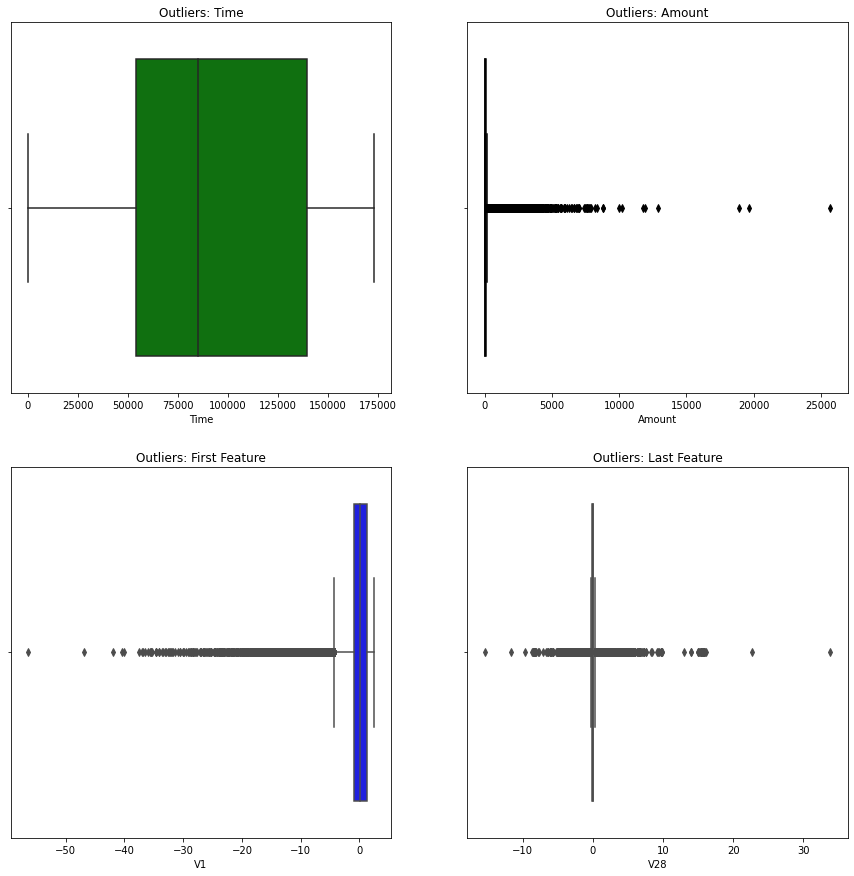

In [10]:
# detecting the outliers
fig, axes = plt.subplots(2, 2)
fig.set_size_inches(15,15)

sns.boxplot(x='Time', data=df, color='green',ax=axes[0,0]).set(title='Outliers: Time')
sns.boxplot(x='Amount', data=df, color='black',ax=axes[0,1]).set(title='Outliers: Amount')
sns.boxplot(x='V1', data=df, color='blue',ax=axes[1,0]).set(title='Outliers: First Feature')
sns.boxplot(x='V28', data=df, color='red',ax=axes[1,1]).set(title='Outliers: Last Feature')

[Text(0.5, 1.0, 'Histogram: Feature 28')]

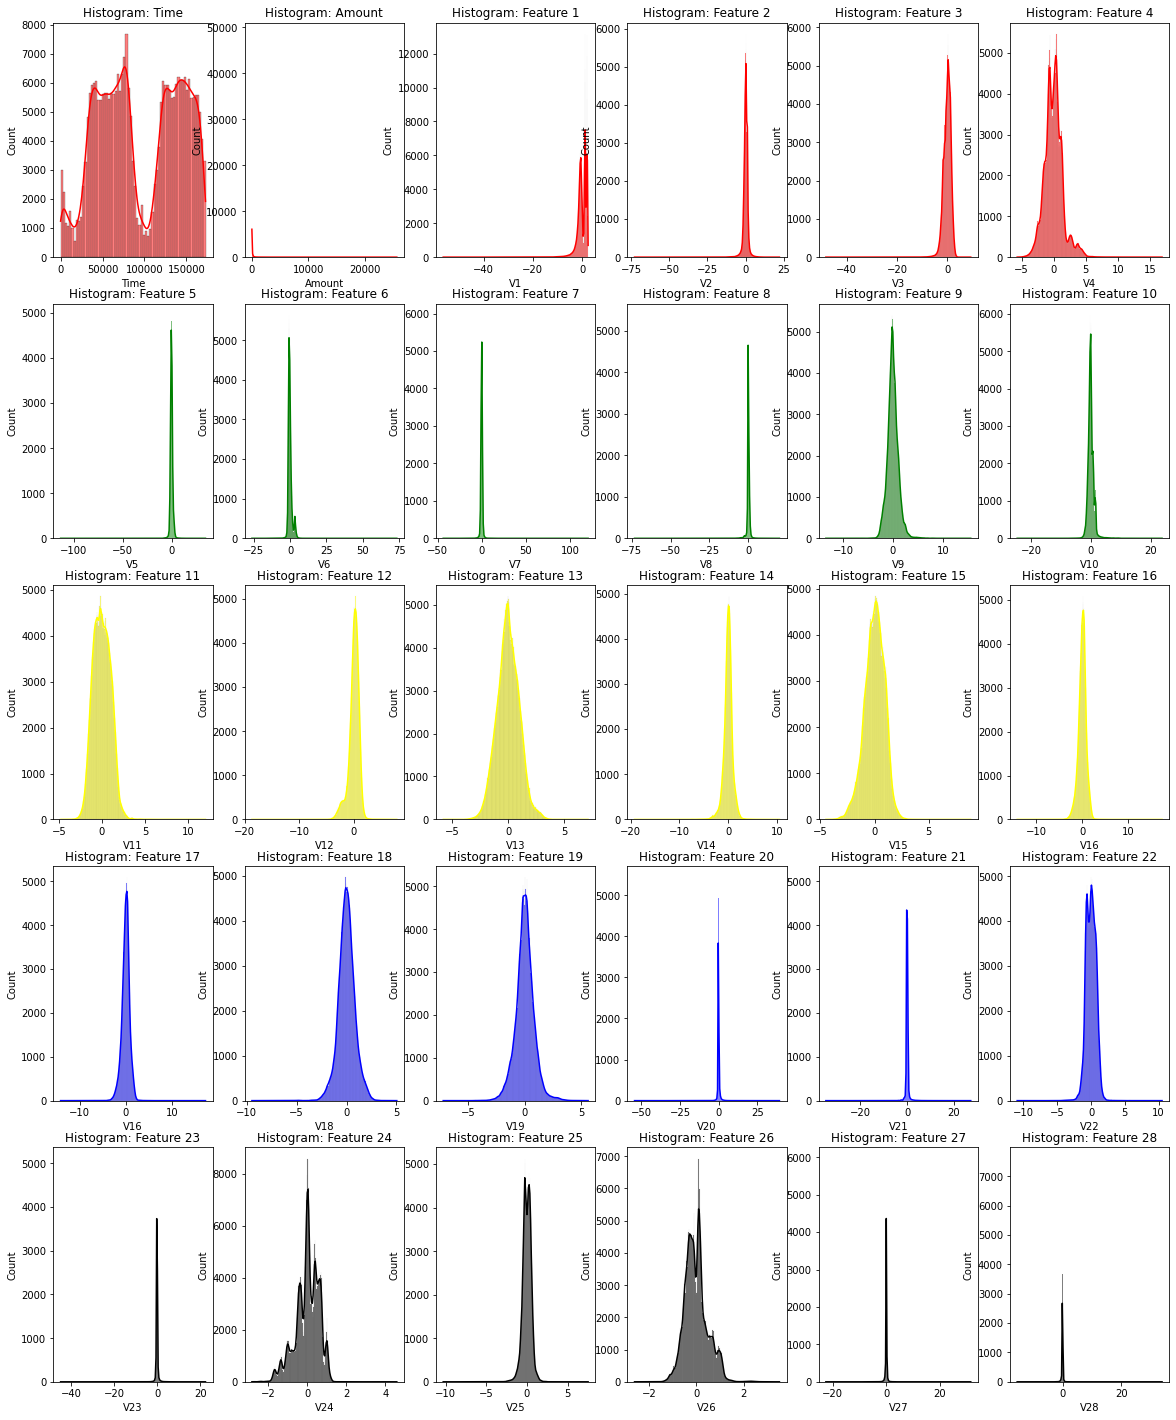

In [11]:
fig, axes = plt.subplots(5, 6)
fig.set_size_inches(20,25)

sns.histplot(df.Time  ,kde=True,color='red',ax=axes[0,0]).set(title='Histogram: Time')
sns.histplot(df.Amount,kde=True,color='red',ax=axes[0,1]).set(title='Histogram: Amount')
sns.histplot(df.V1    ,kde=True,color='red',ax=axes[0,2]).set(title='Histogram: Feature 1')
sns.histplot(df.V2    ,kde=True,color='red',ax=axes[0,3]).set(title='Histogram: Feature 2')
sns.histplot(df.V3    ,kde=True,color='red',ax=axes[0,4]).set(title='Histogram: Feature 3')
sns.histplot(df.V4    ,kde=True,color='red',ax=axes[0,5]).set(title='Histogram: Feature 4')

sns.histplot(df.V5    ,kde=True,color='green',ax=axes[1,0]).set(title='Histogram: Feature 5')
sns.histplot(df.V6    ,kde=True,color='green',ax=axes[1,1]).set(title='Histogram: Feature 6')
sns.histplot(df.V7    ,kde=True,color='green',ax=axes[1,2]).set(title='Histogram: Feature 7')
sns.histplot(df.V8    ,kde=True,color='green',ax=axes[1,3]).set(title='Histogram: Feature 8')
sns.histplot(df.V9    ,kde=True,color='green',ax=axes[1,4]).set(title='Histogram: Feature 9')
sns.histplot(df.V10   ,kde=True,color='green',ax=axes[1,5]).set(title='Histogram: Feature 10')

sns.histplot(df.V11   ,kde=True,color='yellow',ax=axes[2,0]).set(title='Histogram: Feature 11')
sns.histplot(df.V12   ,kde=True,color='yellow',ax=axes[2,1]).set(title='Histogram: Feature 12')
sns.histplot(df.V13   ,kde=True,color='yellow',ax=axes[2,2]).set(title='Histogram: Feature 13')
sns.histplot(df.V14   ,kde=True,color='yellow',ax=axes[2,3]).set(title='Histogram: Feature 14')
sns.histplot(df.V15   ,kde=True,color='yellow',ax=axes[2,4]).set(title='Histogram: Feature 15')
sns.histplot(df.V16   ,kde=True,color='yellow',ax=axes[2,5]).set(title='Histogram: Feature 16')

sns.histplot(df.V16   ,kde=True,color='blue',ax=axes[3,0]).set(title='Histogram: Feature 17')
sns.histplot(df.V18   ,kde=True,color='blue',ax=axes[3,1]).set(title='Histogram: Feature 18')
sns.histplot(df.V19   ,kde=True,color='blue',ax=axes[3,2]).set(title='Histogram: Feature 19')
sns.histplot(df.V20   ,kde=True,color='blue',ax=axes[3,3]).set(title='Histogram: Feature 20')
sns.histplot(df.V21   ,kde=True,color='blue',ax=axes[3,4]).set(title='Histogram: Feature 21')
sns.histplot(df.V22   ,kde=True,color='blue',ax=axes[3,5]).set(title='Histogram: Feature 22')

sns.histplot(df.V23   ,kde=True,color='black',ax=axes[4,0]).set(title='Histogram: Feature 23')
sns.histplot(df.V24   ,kde=True,color='black',ax=axes[4,1]).set(title='Histogram: Feature 24')
sns.histplot(df.V25   ,kde=True,color='black',ax=axes[4,2]).set(title='Histogram: Feature 25')
sns.histplot(df.V26   ,kde=True,color='black',ax=axes[4,3]).set(title='Histogram: Feature 26')
sns.histplot(df.V27   ,kde=True,color='black',ax=axes[4,4]).set(title='Histogram: Feature 27')
sns.histplot(df.V28   ,kde=True,color='black',ax=axes[4,5]).set(title='Histogram: Feature 28')

In [12]:
# Correlation between dataset columns
df.corr()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
Time,1.000000,0.117927,-0.010556,-0.422054,-0.105845,0.173223,-0.063279,0.085335,-0.038203,-0.007861,...,0.045913,0.143727,0.051474,-0.015954,-0.233262,-0.041818,-0.005171,-0.009305,-0.010559,-0.012359
V1,0.117927,1.000000,0.006875,-0.008112,0.002257,-0.007036,0.000413,-0.009173,-0.001168,0.001828,...,0.002818,-0.001436,-0.001330,-0.000723,-0.000222,-0.000684,-0.015706,-0.004861,-0.230105,-0.094486
V2,-0.010556,0.006875,1.000000,0.005278,-0.001495,0.005210,-0.000594,0.007425,0.002899,-0.000274,...,-0.004897,0.001237,-0.003855,0.000701,-0.001569,0.000253,0.007555,0.001611,-0.533428,0.084624
V3,-0.422054,-0.008112,0.005278,1.000000,0.002829,-0.006879,-0.001511,-0.011721,-0.001815,-0.003579,...,0.003500,-0.000275,0.000449,-0.000072,0.000425,-0.000094,-0.007051,-0.000134,-0.212410,-0.182322
V4,-0.105845,0.002257,-0.001495,0.002829,1.000000,0.001744,-0.000880,0.004657,0.000890,0.002154,...,-0.001034,0.000115,0.000732,-0.000120,0.000162,0.000777,0.001322,0.000231,0.099514,0.129326
V5,0.173223,-0.007036,0.005210,-0.006879,0.001744,1.000000,-0.000938,-0.008709,0.001430,-0.001213,...,0.001622,-0.000559,0.001183,0.000198,0.000069,0.000390,-0.005798,-0.000820,-0.387685,-0.087812
V6,-0.063279,0.000413,-0.000594,-0.001511,-0.000880,-0.000938,1.000000,0.000436,0.003036,-0.000734,...,-0.002134,0.001104,-0.000755,0.001202,0.000697,-0.000028,0.000289,0.000925,0.216389,-0.043915
V7,0.085335,-0.009173,0.007425,-0.011721,0.004657,-0.008709,0.000436,1.000000,-0.006419,-0.004921,...,0.009010,-0.002280,0.003303,-0.000384,-0.000072,0.000624,-0.004537,0.001657,0.400408,-0.172347
V8,-0.038203,-0.001168,0.002899,-0.001815,0.000890,0.001430,0.003036,-0.006419,1.000000,0.001038,...,0.018892,-0.006156,0.004994,0.000113,0.000011,-0.001407,0.000613,-0.000099,-0.104662,0.033068
V9,-0.007861,0.001828,-0.000274,-0.003579,0.002154,-0.001213,-0.000734,-0.004921,0.001038,1.000000,...,0.000679,0.000785,0.000677,-0.000103,-0.000275,0.001253,0.008221,0.005591,-0.044123,-0.094021


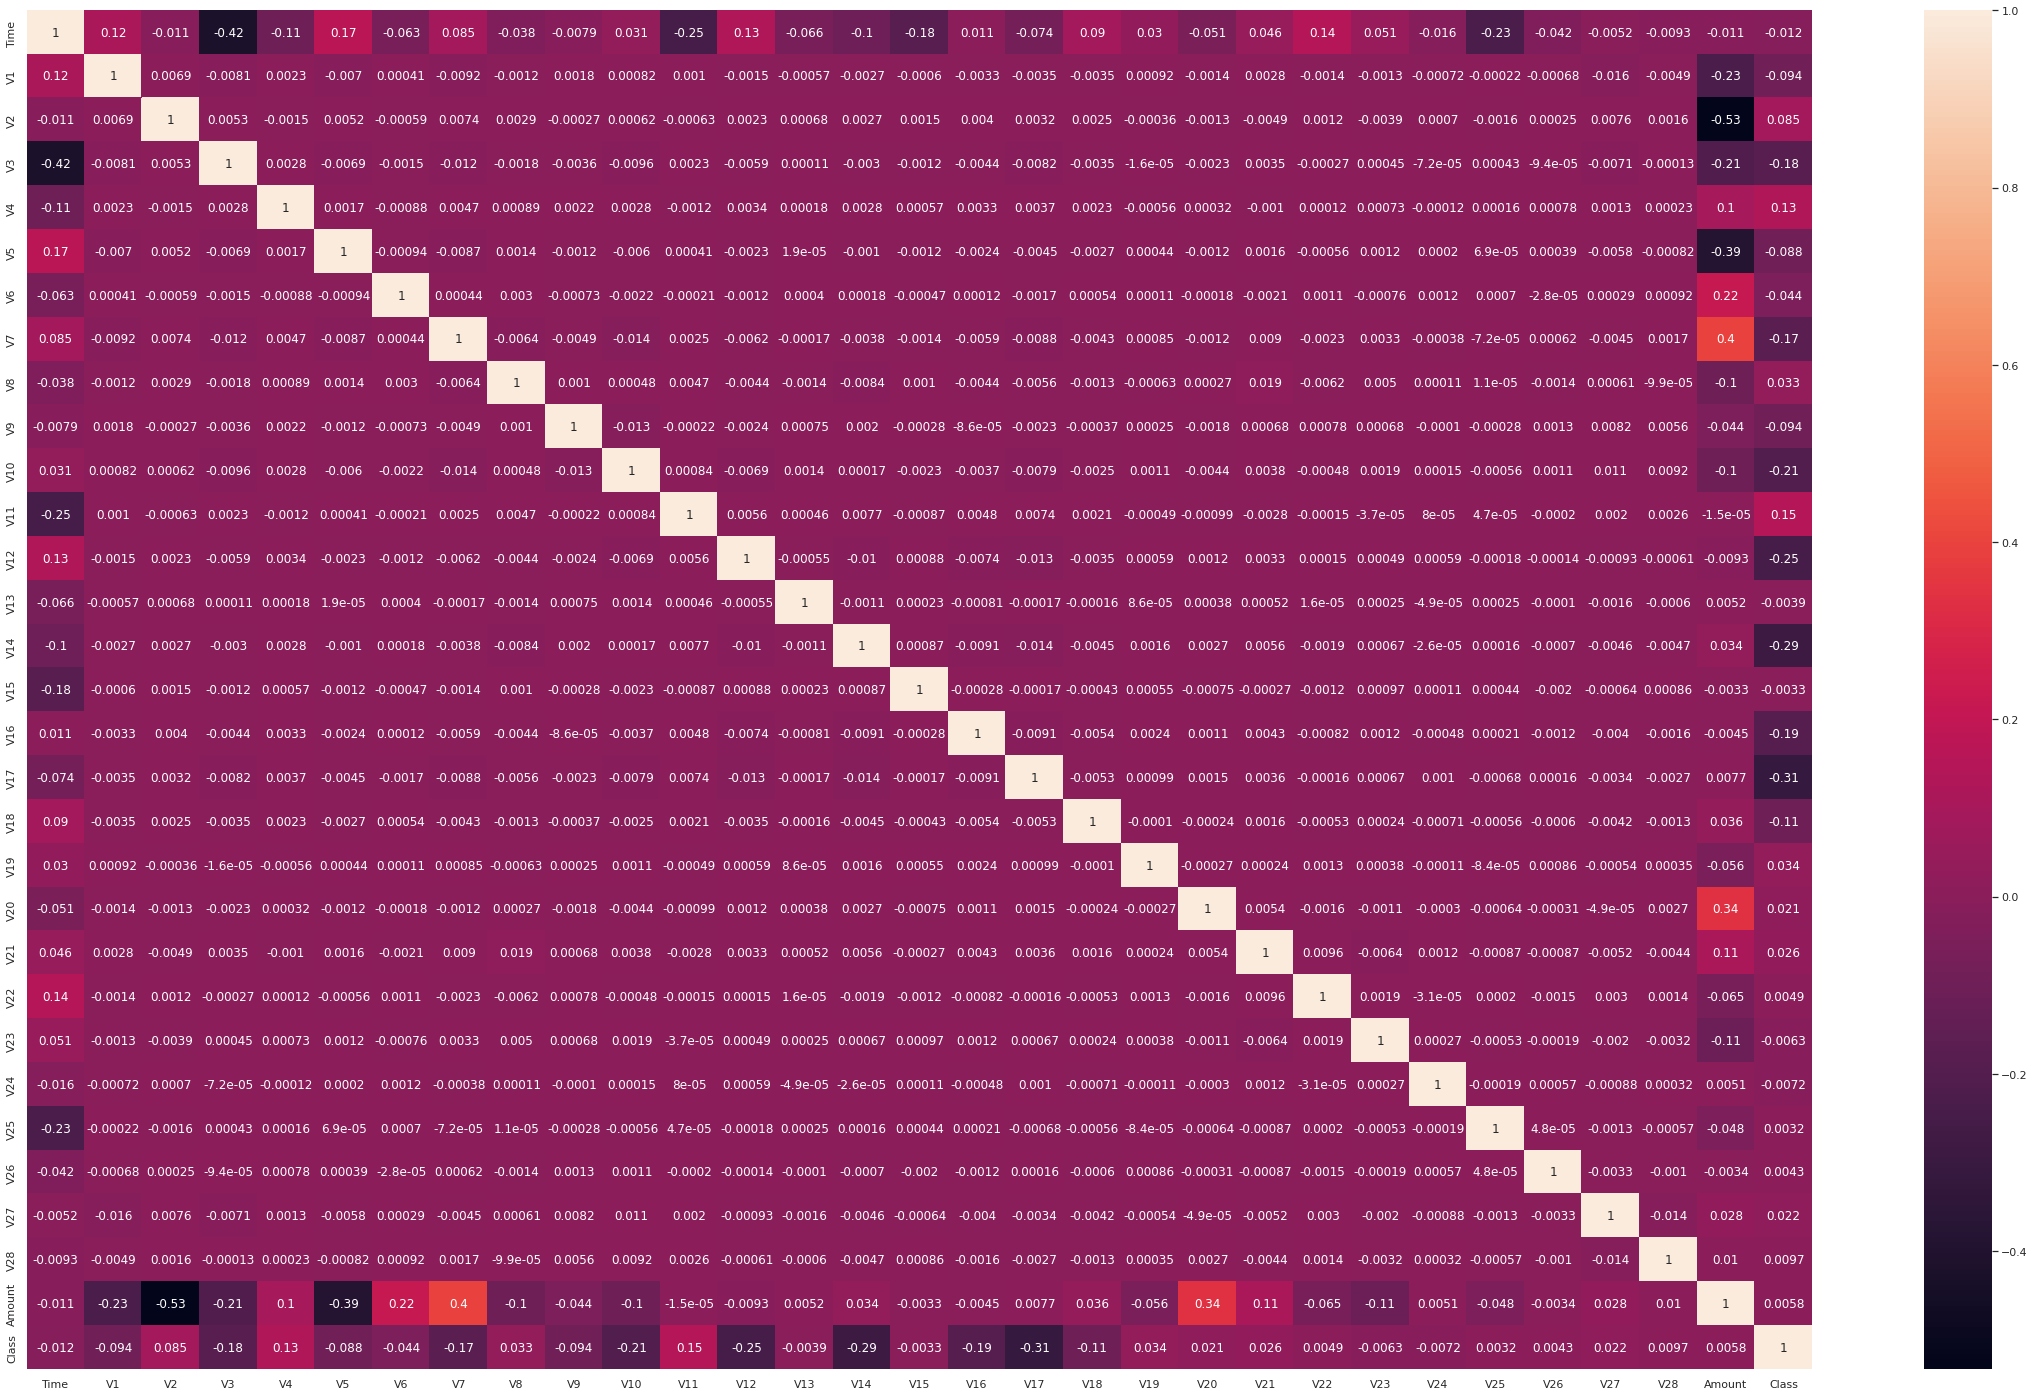

In [13]:
#Visualizing the correlation between the features:
sns.set(rc={'figure.figsize':(40,25)})
sns.heatmap(df.corr(),annot=True)

## Comments

The are too many zeros with respect to ones in Class Column (Output)

Therefore, Imbalanced Classification

----------------------------------------------------------------------------------------------------------------------------------------------------------------

# C) Machine Learning 

## Imblanced Data

In [64]:
x = df.drop('Class',axis=1)
y = df['Class']

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [66]:
Rand_under_samp  = RandomUnderSampler()
x_sample, y_sample = Rand_under_samp.fit_resample(x_train,y_train)

print("original data label", Counter(y_train))
print("resampled data label", Counter(y_sample))

original data label Counter({0: 226597, 1: 383})
resampled data label Counter({0: 383, 1: 383})


## Logistic Regression

In [45]:
# Logistic Regression Fitting
Logmodel = LogisticRegression(max_iter=1000)
Logmodel.fit(x_sample,y_sample)
y_pred = Logmodel.predict(x_test)

# Classification Report
class_report = classification_report(y_test,y_pred)
print(class_report)

              precision    recall  f1-score   support

           0       1.00      0.96      0.98     56656
           1       0.03      0.89      0.06        90

    accuracy                           0.96     56746
   macro avg       0.52      0.92      0.52     56746
weighted avg       1.00      0.96      0.98     56746



In [49]:
# Trying Changing Threshold
decisions = (Logmodel.predict_proba(x_test) >= 0.7).astype(int)[:,1]

class_report = classification_report(y_test,decisions)
print(class_report)

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     56656
           1       0.06      0.88      0.11        90

    accuracy                           0.98     56746
   macro avg       0.53      0.93      0.55     56746
weighted avg       1.00      0.98      0.99     56746



[Text(0, 0.5, '0'), Text(0, 1.5, '1')]

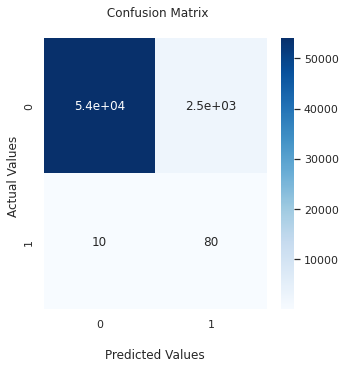

In [50]:
# Displaying Confusion Matrix
cf_matrix = confusion_matrix(y_test,y_pred)
sns.set(rc={'figure.figsize':(5,5)})
ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')

ax.set_title(' Confusion Matrix\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

ax.xaxis.set_ticklabels(['0','1'])
ax.yaxis.set_ticklabels(['0','1'])

In [52]:
#Model Evaluation
accuracy  = metrics.accuracy_score(y_test,y_pred)
recall = metrics.recall_score(y_test,y_pred)
precision = metrics.precision_score(y_test,y_pred)
f1_score = metrics.f1_score(y_test,y_pred)

print(f'Model Accuracy = {100*accuracy:0.3} %' )
print(f'Model recall = {100*recall:0.3} %' )
print(f'Model precision = {100*precision:0.3} %' )
print(f'Model f1_score = {100*f1_score:0.3} %' )

Model Accuracy = 95.6 %
Model recall = 88.9 %
Model precision = 3.1 %
Model f1_score = 5.99 %


Text(0, 0.5, 'True Positive Rate (Sensitivity)')

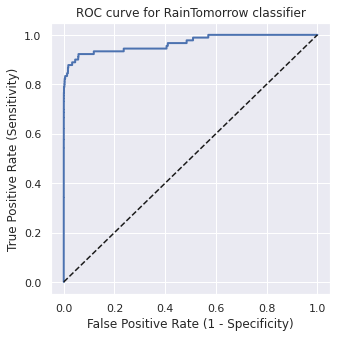

In [53]:
#ROC Curve
y_pred_proba = Logmodel.predict_proba(x_test)[::,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

plt.plot(fpr, tpr, linewidth=2)
plt.plot([0,1], [0,1], 'k--' )
plt.title('ROC curve for RainTomorrow classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')

In [54]:
# ROC Evaluation
ROC_AUC = metrics.roc_auc_score(y_test,y_pred_proba)
print(f'Model ROC_AUC = {100*ROC_AUC:0.3} %' )

Model ROC_AUC = 96.6 %


## KNN Algorithm

(0.0, 5.0)

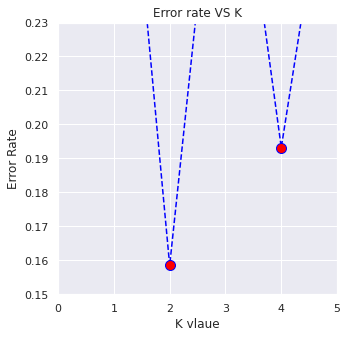

In [76]:
# KNN Tuning
error_rate = []

for i in range(1,50):
  Knn_tuning = KNeighborsClassifier(n_neighbors=i)
  Knn_tuning.fit(x_sample,y_sample)
  predict_i= Knn_tuning.predict(x_test)
  error_rate.append(np.mean(predict_i != y_test))

plt.plot(range(1,50), error_rate, color='blue', linestyle = 'dashed', marker = 'o', markerfacecolor = 'red', markersize = 10)
plt.title("Error rate VS K")
plt.xlabel('K vlaue')
plt.ylabel('Error Rate')

plt.ylim(0.15,0.23)
plt.xlim(0,5)

In [86]:
# KNN Algorithm Fitting (Optimum k=2)
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(x_sample,y_sample)
y_pred = knn.predict(x_test)

class_report = metrics.classification_report(y_test,y_pred)
print(class_report)

              precision    recall  f1-score   support

           0       1.00      0.84      0.91     56656
           1       0.00      0.37      0.01        90

    accuracy                           0.84     56746
   macro avg       0.50      0.60      0.46     56746
weighted avg       1.00      0.84      0.91     56746



[Text(0, 0.5, '0'), Text(0, 1.5, '1')]

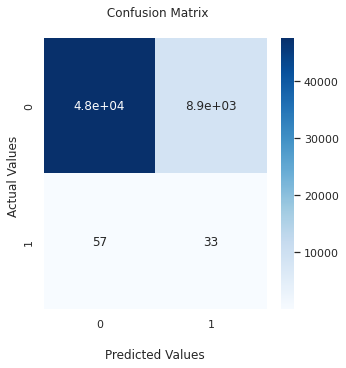

In [87]:
# Displaying Confusion Matrix
cf_matrix = confusion_matrix(y_test,y_pred)
sns.set(rc={'figure.figsize':(5,5)})
ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')

ax.set_title(' Confusion Matrix\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

ax.xaxis.set_ticklabels(['0','1'])
ax.yaxis.set_ticklabels(['0','1'])

In [88]:
#Model Evaluation
accuracy  = metrics.accuracy_score(y_test,y_pred)
recall = metrics.recall_score(y_test,y_pred)
precision = metrics.precision_score(y_test,y_pred)
f1_score = metrics.f1_score(y_test,y_pred)

print(f'Model Accuracy = {100*accuracy:0.3} %' )
print(f'Model recall = {100*recall:0.3} %' )
print(f'Model precision = {100*precision:0.3} %' )
print(f'Model f1_score = {100*f1_score:0.3} %' )

Model Accuracy = 84.1 %
Model recall = 36.7 %
Model precision = 0.368 %
Model f1_score = 0.728 %


Text(0, 0.5, 'True Positive Rate (Sensitivity)')

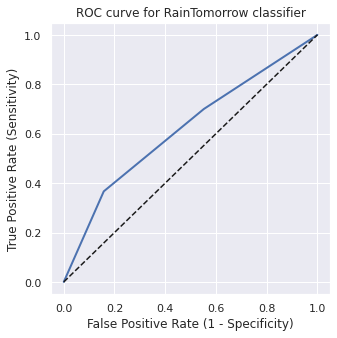

In [89]:
#ROC Curve
y_pred_proba = knn.predict_proba(x_test)[::,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

plt.plot(fpr, tpr, linewidth=2)
plt.plot([0,1], [0,1], 'k--' )
plt.title('ROC curve for RainTomorrow classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')

In [90]:
# ROC Evaluation
ROC_AUC = metrics.roc_auc_score(y_test,y_pred_proba)
print(f'Model ROC_AUC = {100*ROC_AUC:0.3} %' )

Model ROC_AUC = 62.0 %


## SVM Algorithm 

In [91]:
# SVM Algorithm Fitting
svm_model = svm.SVC(probability=True)
svm_model.fit(x_sample,y_sample)
y_pred = svm_model.predict(x_test)


class_report = metrics.classification_report(y_test,y_pred)
print(class_report)

              precision    recall  f1-score   support

           0       1.00      0.73      0.84     56656
           1       0.00      0.37      0.00        90

    accuracy                           0.73     56746
   macro avg       0.50      0.55      0.42     56746
weighted avg       1.00      0.73      0.84     56746



[Text(0, 0.5, '0'), Text(0, 1.5, '1')]

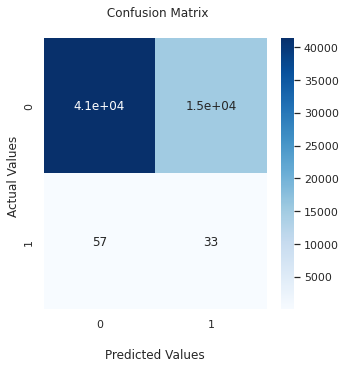

In [92]:
# Displaying Confusion Matrix
cf_matrix = confusion_matrix(y_test,y_pred)
sns.set(rc={'figure.figsize':(5,5)})
ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')

ax.set_title(' Confusion Matrix\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

ax.xaxis.set_ticklabels(['0','1'])
ax.yaxis.set_ticklabels(['0','1'])

In [93]:
#Model Evaluation
accuracy  = metrics.accuracy_score(y_test,y_pred)
recall = metrics.recall_score(y_test,y_pred)
precision = metrics.precision_score(y_test,y_pred)
f1_score = metrics.f1_score(y_test,y_pred)

print(f'Model Accuracy = {100*accuracy:0.3} %' )
print(f'Model recall = {100*recall:0.3} %' )
print(f'Model precision = {100*precision:0.3} %' )
print(f'Model f1_score = {100*f1_score:0.3} %' )

Model Accuracy = 73.2 %
Model recall = 36.7 %
Model precision = 0.217 %
Model f1_score = 0.431 %


Text(0, 0.5, 'True Positive Rate (Sensitivity)')

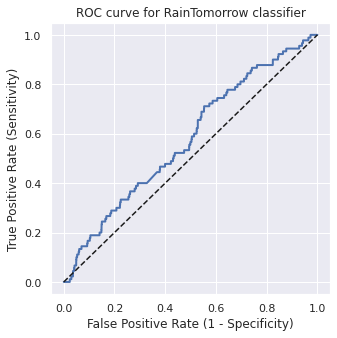

In [94]:
#ROC Curve
y_pred_proba = svm_model.predict_proba(x_test)[::,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

plt.plot(fpr, tpr, linewidth=2)
plt.plot([0,1], [0,1], 'k--' )
plt.title('ROC curve for RainTomorrow classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')

In [95]:
# ROC Evaluation
ROC_AUC = metrics.roc_auc_score(y_test,y_pred_proba)
print(f'Model ROC_AUC = {100*ROC_AUC:0.3} %' )

Model ROC_AUC = 57.7 %


## Decision Tree

In [96]:
# Decision Tree Fitting
DT_model = DecisionTreeClassifier()
DT_model.fit(x_sample,y_sample)
y_pred = DT_model.predict(x_test)

class_report = metrics.classification_report(y_test,y_pred)
print(class_report)

              precision    recall  f1-score   support

           0       1.00      0.90      0.95     56656
           1       0.02      0.93      0.03        90

    accuracy                           0.90     56746
   macro avg       0.51      0.92      0.49     56746
weighted avg       1.00      0.90      0.95     56746



[Text(0, 0.5, '0'), Text(0, 1.5, '1')]

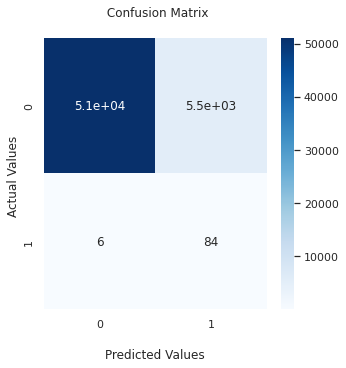

In [97]:
# Displaying Confusion Matrix
cf_matrix = confusion_matrix(y_test,y_pred)
sns.set(rc={'figure.figsize':(5,5)})
ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')

ax.set_title(' Confusion Matrix\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

ax.xaxis.set_ticklabels(['0','1'])
ax.yaxis.set_ticklabels(['0','1'])

In [98]:
#Model Evaluation
accuracy  = metrics.accuracy_score(y_test,y_pred)
recall = metrics.recall_score(y_test,y_pred)
precision = metrics.precision_score(y_test,y_pred)
f1_score = metrics.f1_score(y_test,y_pred)

print(f'Model Accuracy = {100*accuracy:0.3} %' )
print(f'Model recall = {100*recall:0.3} %' )
print(f'Model precision = {100*precision:0.3} %' )
print(f'Model f1_score = {100*f1_score:0.3} %' )

Model Accuracy = 90.3 %
Model recall = 93.3 %
Model precision = 1.5 %
Model f1_score = 2.96 %


Text(0, 0.5, 'True Positive Rate (Sensitivity)')

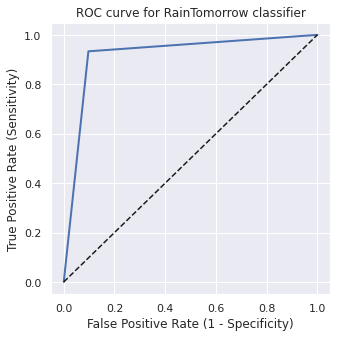

In [99]:
#ROC Curve
y_pred_proba = DT_model.predict_proba(x_test)[::,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

plt.plot(fpr, tpr, linewidth=2)
plt.plot([0,1], [0,1], 'k--' )
plt.title('ROC curve for RainTomorrow classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')

In [100]:
# ROC Evaluation
ROC_AUC = metrics.roc_auc_score(y_test,y_pred_proba)
print(f'Model ROC_AUC = {100*ROC_AUC:0.3} %' )

Model ROC_AUC = 91.8 %


In [109]:
# Exporting Tree0
columns_name = ['Time','V1','V2','V3','V4','V5','V6','V7','V8','V9','V10','V11','V12','V13','V14','V15',
                'V16','V17','V18','V19','V20','V21','V22','V23','V24','V25','V26','V27','V28','Amount']
tree_text = tree.export_text(DT_model, feature_names=columns_name)

print(tree_text)

|--- V14 <= -2.21
|   |--- V12 <= 0.51
|   |   |--- V10 <= 6.29
|   |   |   |--- V1 <= 1.97
|   |   |   |   |--- V10 <= 0.61
|   |   |   |   |   |--- V1 <= 1.26
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- V1 >  1.26
|   |   |   |   |   |   |--- V25 <= 0.72
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |--- V25 >  0.72
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |--- V10 >  0.61
|   |   |   |   |   |--- V20 <= 0.11
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- V20 >  0.11
|   |   |   |   |   |   |--- class: 0
|   |   |   |--- V1 >  1.97
|   |   |   |   |--- class: 0
|   |   |--- V10 >  6.29
|   |   |   |--- class: 0
|   |--- V12 >  0.51
|   |   |--- class: 0
|--- V14 >  -2.21
|   |--- V4 <= 2.22
|   |   |--- V14 <= -0.66
|   |   |   |--- V11 <= 1.11
|   |   |   |   |--- V4 <= -0.02
|   |   |   |   |   |--- V11 <= 0.85
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- V11 >  0.85
|   |   |   |   |   |   |-

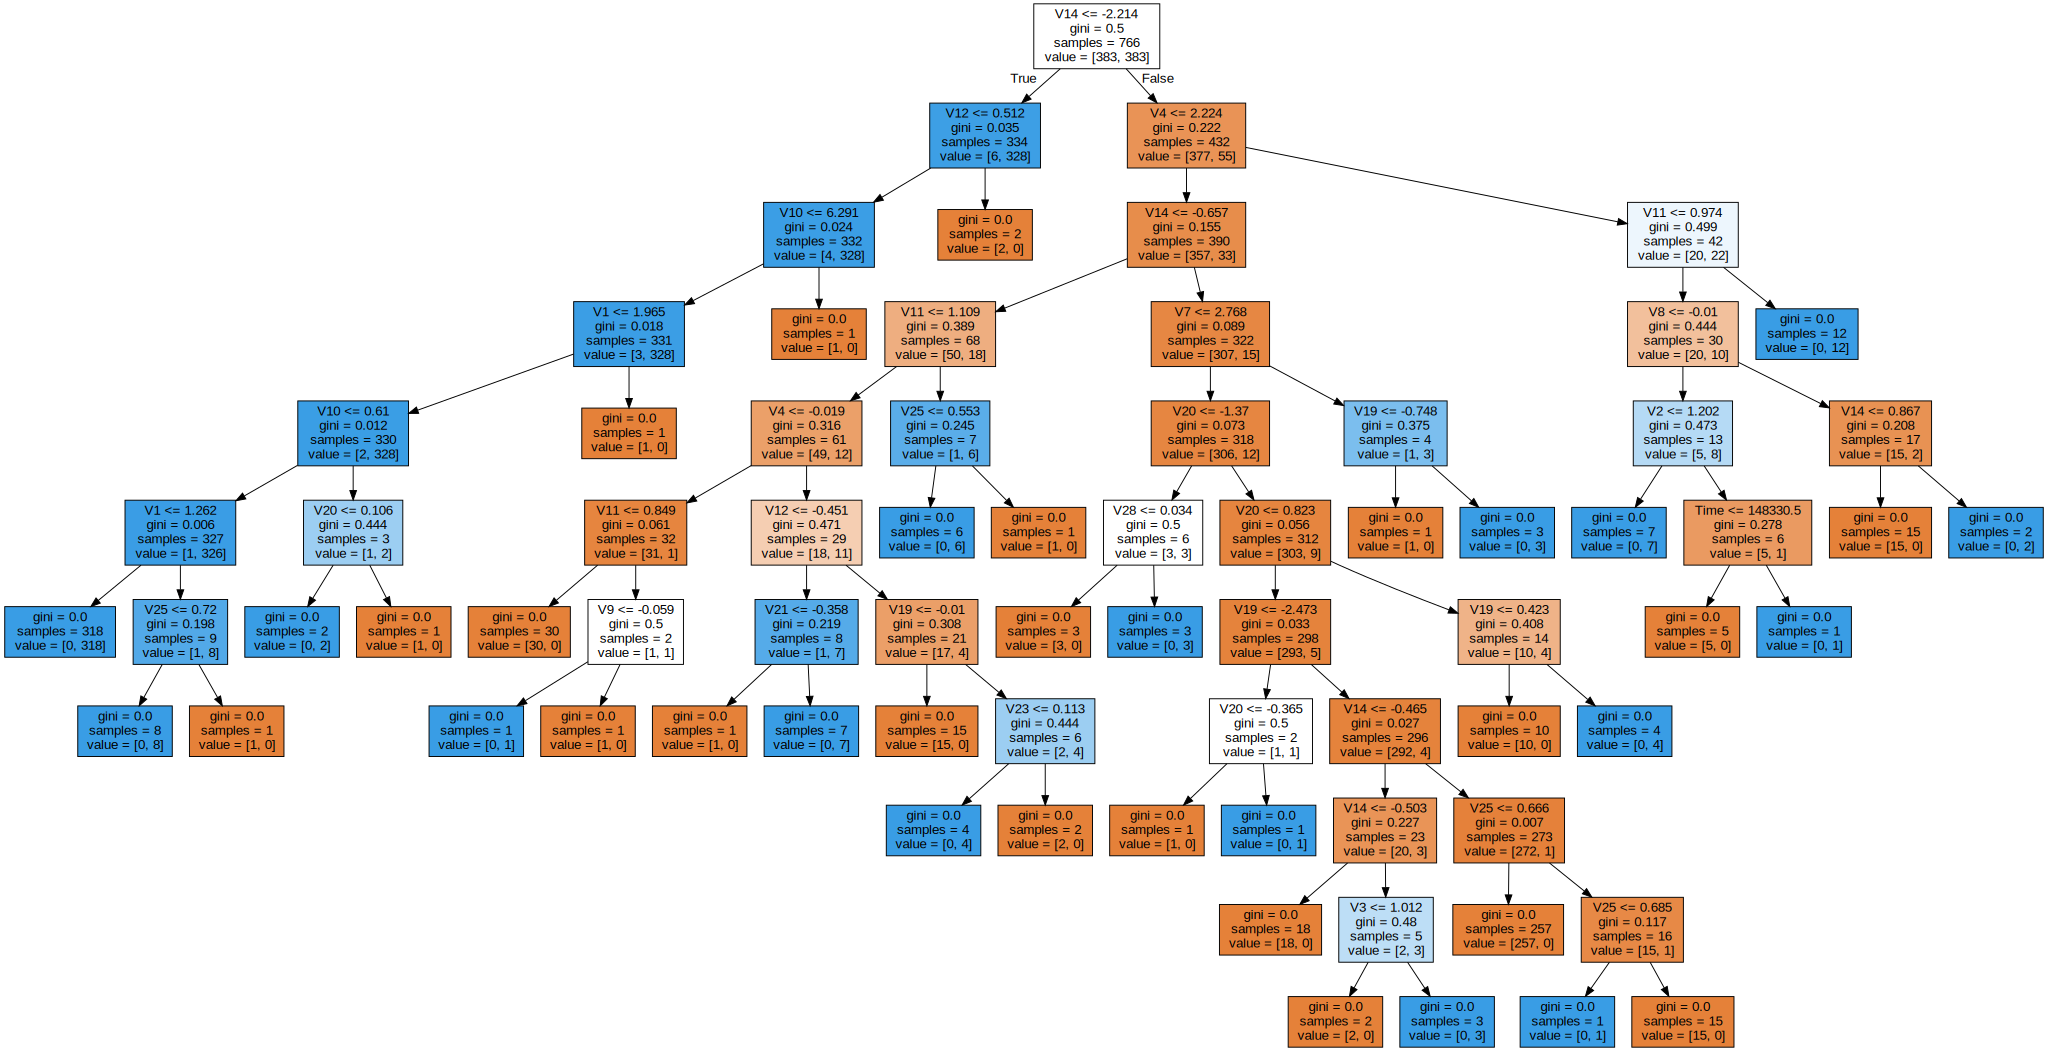

In [106]:
# Visualizing Tree
data_dot = tree.export_graphviz(DT_model,feature_names=columns_name, filled=True)
graph = graphviz.Source(data_dot,format='png')

graph

Text(0.5, 0, 'Relative Importance')

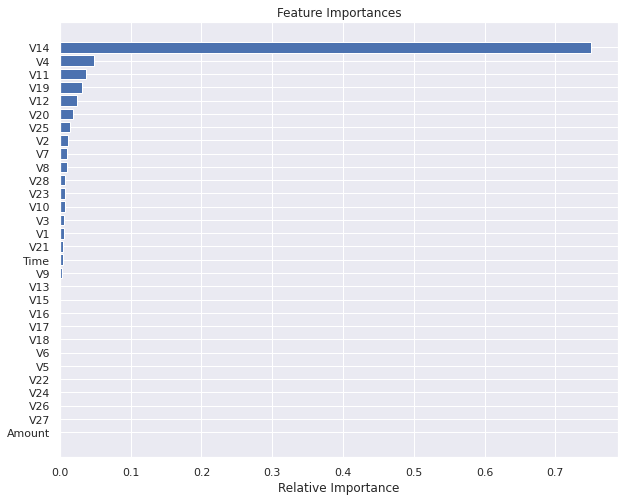

In [108]:
#Feature Importance
features = x.columns
importances = DT_model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(10,8))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')

## Random Forest

In [111]:
# Random Forest Fitting
RF_model = RandomForestClassifier()
RF_model.fit(x_sample,y_sample)
y_pred = RF_model.predict(x_test)

class_report = metrics.classification_report(y_test,y_pred)
print(class_report)

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     56656
           1       0.07      0.87      0.13        90

    accuracy                           0.98     56746
   macro avg       0.53      0.92      0.56     56746
weighted avg       1.00      0.98      0.99     56746



[Text(0, 0.5, '0'), Text(0, 1.5, '1')]

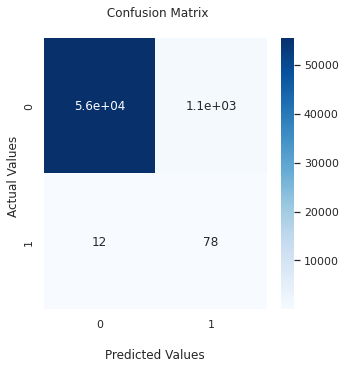

In [112]:
# Displaying Confusion Matrix
cf_matrix = confusion_matrix(y_test,y_pred)
sns.set(rc={'figure.figsize':(5,5)})
ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')

ax.set_title(' Confusion Matrix\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

ax.xaxis.set_ticklabels(['0','1'])
ax.yaxis.set_ticklabels(['0','1'])

In [113]:
#Model Evaluation
accuracy  = metrics.accuracy_score(y_test,y_pred)
recall = metrics.recall_score(y_test,y_pred)
precision = metrics.precision_score(y_test,y_pred)
f1_score = metrics.f1_score(y_test,y_pred)

print(f'Model Accuracy = {100*accuracy:0.3} %' )
print(f'Model recall = {100*recall:0.3} %' )
print(f'Model precision = {100*precision:0.3} %' )
print(f'Model f1_score = {100*f1_score:0.3} %' )

Model Accuracy = 98.1 %
Model recall = 86.7 %
Model precision = 6.76 %
Model f1_score = 12.6 %


Text(0, 0.5, 'True Positive Rate (Sensitivity)')

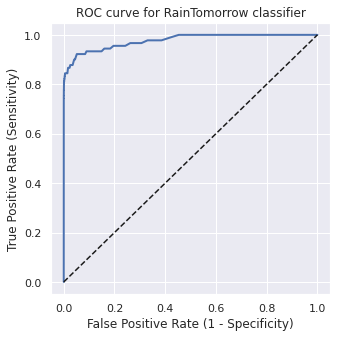

In [114]:
#ROC Curve
y_pred_proba = RF_model.predict_proba(x_test)[::,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

plt.plot(fpr, tpr, linewidth=2)
plt.plot([0,1], [0,1], 'k--' )
plt.title('ROC curve for RainTomorrow classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')

In [115]:
# ROC Evaluation
ROC_AUC = metrics.roc_auc_score(y_test,y_pred_proba)
print(f'Model ROC_AUC = {100*ROC_AUC:0.3} %' )

Model ROC_AUC = 97.7 %


In [116]:
# Exporting Random Forest
columns_name = ['Time','V1','V2','V3','V4','V5','V6','V7','V8','V9','V10','V11','V12','V13','V14','V15',
                'V16','V17','V18','V19','V20','V21','V22','V23','V24','V25','V26','V27','V28','Amount']

for tree_model in RF_model.estimators_:
  tree_text = tree.export_text(tree_model, feature_names=columns_name )

  print(tree_text)

Streaming output truncated to the last 5000 lines.
|   |   |   |--- V17 <= -2.40
|   |   |   |   |--- class: 1.0
|   |   |   |--- V17 >  -2.40
|   |   |   |   |--- V7 <= 3.63
|   |   |   |   |   |--- V25 <= -2.74
|   |   |   |   |   |   |--- class: 1.0
|   |   |   |   |   |--- V25 >  -2.74
|   |   |   |   |   |   |--- V15 <= 2.10
|   |   |   |   |   |   |   |--- V14 <= -0.66
|   |   |   |   |   |   |   |   |--- V14 <= -0.67
|   |   |   |   |   |   |   |   |   |--- V19 <= -0.42
|   |   |   |   |   |   |   |   |   |   |--- V18 <= 0.78
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 2
|   |   |   |   |   |   |   |   |   |   |--- V18 >  0.78
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 3
|   |   |   |   |   |   |   |   |   |--- V19 >  -0.42
|   |   |   |   |   |   |   |   |   |   |--- V3 <= -2.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 2
|   |   |   |   |   |   |   |   |   |   |--- V3 >  -2.50
|   |

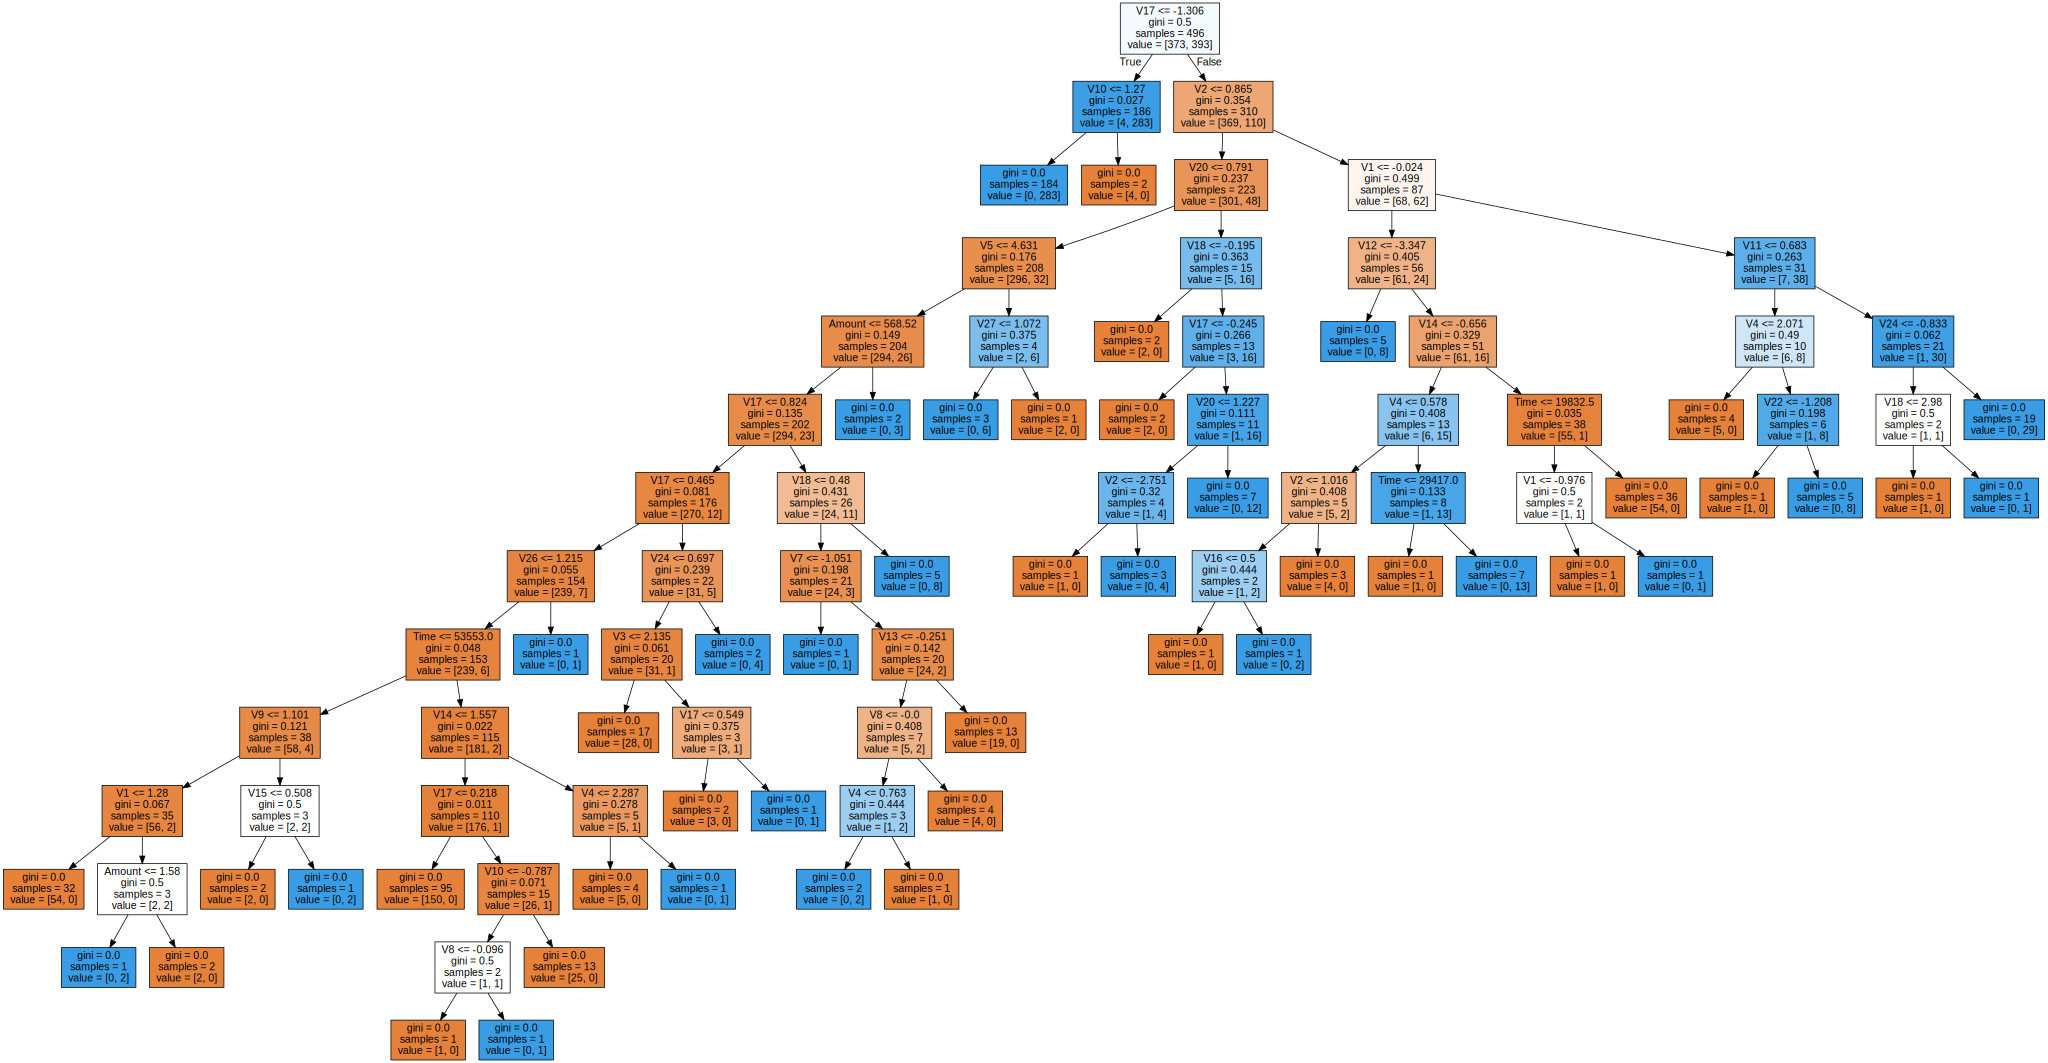

In [118]:
# Visualizing Random Forest
for tree_model in RF_model.estimators_:
  data_dot = tree.export_graphviz(tree_model,feature_names=columns_name, filled=True)
  graph = graphviz.Source(data_dot,format='png')

graph

Text(0.5, 0, 'Relative Importance')

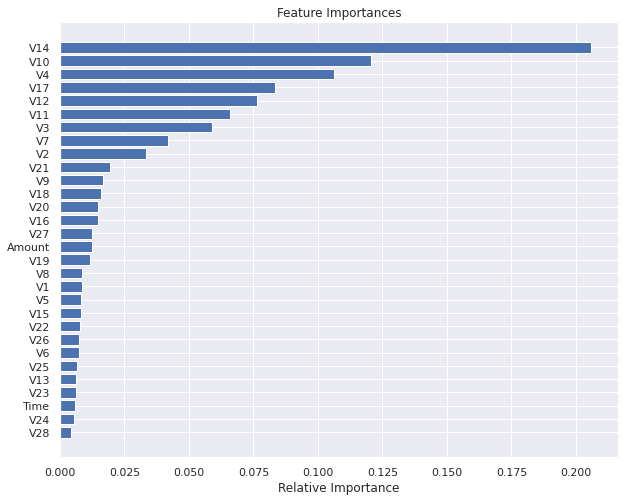

In [119]:
#Feature Importance
features = x.columns
importances = RF_model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(10,8))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')

## XGboost

In [120]:
# XGBoost Fitting
XGB_model = XGBClassifier()
XGB_model.fit(x_sample,y_sample)
y_pred = XGB_model.predict(x_test)

class_report = metrics.classification_report(y_test,y_pred)
print(class_report)

              precision    recall  f1-score   support

           0       1.00      0.97      0.99     56656
           1       0.05      0.88      0.10        90

    accuracy                           0.97     56746
   macro avg       0.53      0.93      0.54     56746
weighted avg       1.00      0.97      0.99     56746



[Text(0, 0.5, '0'), Text(0, 1.5, '1')]

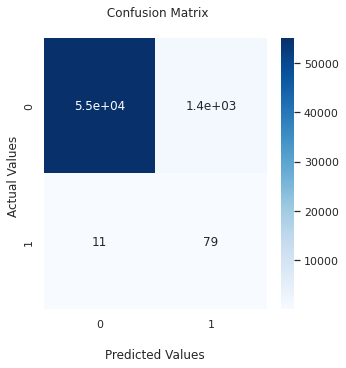

In [121]:
# Displaying Confusion Matrix
cf_matrix = confusion_matrix(y_test,y_pred)
sns.set(rc={'figure.figsize':(5,5)})
ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')

ax.set_title(' Confusion Matrix\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

ax.xaxis.set_ticklabels(['0','1'])
ax.yaxis.set_ticklabels(['0','1'])

In [122]:
#Model Evaluation
accuracy  = metrics.accuracy_score(y_test,y_pred)
recall = metrics.recall_score(y_test,y_pred)
precision = metrics.precision_score(y_test,y_pred)
f1_score = metrics.f1_score(y_test,y_pred)

print(f'Model Accuracy = {100*accuracy:0.3} %' )
print(f'Model recall = {100*recall:0.3} %' )
print(f'Model precision = {100*precision:0.3} %' )
print(f'Model f1_score = {100*f1_score:0.3} %' )

Model Accuracy = 97.5 %
Model recall = 87.8 %
Model precision = 5.23 %
Model f1_score = 9.87 %


Text(0, 0.5, 'True Positive Rate (Sensitivity)')

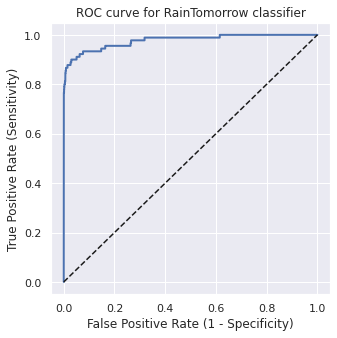

In [124]:
#ROC Curve
y_pred_proba = XGB_model.predict_proba(x_test)[::,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

plt.plot(fpr, tpr, linewidth=2)
plt.plot([0,1], [0,1], 'k--' )
plt.title('ROC curve for RainTomorrow classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')

In [125]:
# ROC Evaluation
ROC_AUC = metrics.roc_auc_score(y_test,y_pred_proba)
print(f'Model ROC_AUC = {100*ROC_AUC:0.3} %' )

Model ROC_AUC = 97.7 %


## Naive Bayes

In [126]:
# Naive Bayes Fitting
Nb_model = GaussianNB()
Nb_model.fit(x_sample,y_sample)
y_pred = Nb_model.predict(x_test)

class_report = metrics.classification_report(y_test,y_pred)
print(class_report)

              precision    recall  f1-score   support

           0       1.00      0.99      0.99     56656
           1       0.08      0.67      0.14        90

    accuracy                           0.99     56746
   macro avg       0.54      0.83      0.57     56746
weighted avg       1.00      0.99      0.99     56746



[Text(0, 0.5, '0'), Text(0, 1.5, '1')]

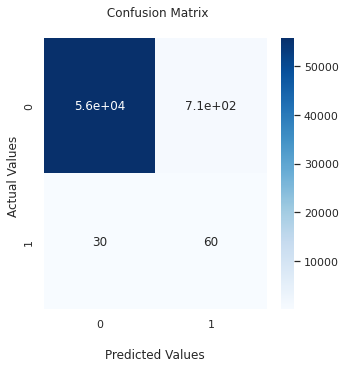

In [127]:
# Displaying Confusion Matrix
cf_matrix = confusion_matrix(y_test,y_pred)
sns.set(rc={'figure.figsize':(5,5)})
ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')

ax.set_title(' Confusion Matrix\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

ax.xaxis.set_ticklabels(['0','1'])
ax.yaxis.set_ticklabels(['0','1'])

In [128]:
#Model Evaluation
accuracy  = metrics.accuracy_score(y_test,y_pred)
recall = metrics.recall_score(y_test,y_pred)
precision = metrics.precision_score(y_test,y_pred)
f1_score = metrics.f1_score(y_test,y_pred)

print(f'Model Accuracy = {100*accuracy:0.3} %' )
print(f'Model recall = {100*recall:0.3} %' )
print(f'Model precision = {100*precision:0.3} %' )
print(f'Model f1_score = {100*f1_score:0.3} %' )

Model Accuracy = 98.7 %
Model recall = 66.7 %
Model precision = 7.82 %
Model f1_score = 14.0 %


Text(0, 0.5, 'True Positive Rate (Sensitivity)')

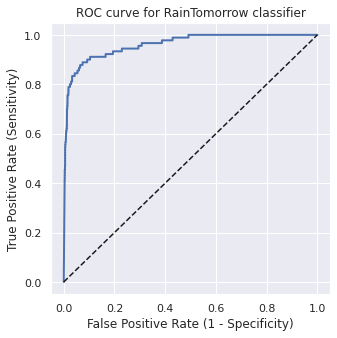

In [129]:
#ROC Curve
y_pred_proba = Nb_model.predict_proba(x_test)[::,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

plt.plot(fpr, tpr, linewidth=2)
plt.plot([0,1], [0,1], 'k--' )
plt.title('ROC curve for RainTomorrow classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')

In [130]:
# ROC Evaluation
ROC_AUC = metrics.roc_auc_score(y_test,y_pred_proba)
print(f'Model ROC_AUC = {100*ROC_AUC:0.3} %' )

Model ROC_AUC = 96.1 %


## Ensembling


In [137]:
# Ensembling Fitting
model_1 = LogisticRegression(max_iter=1000)
model_2 = KNeighborsClassifier(n_neighbors=2)
model_3 = svm.SVC(probability=True)
model_4 = DecisionTreeClassifier()
model_5 = RandomForestClassifier()
model_6 = XGBClassifier()
model_7 = GaussianNB()


final_model = VotingClassifier(
    estimators=[("LR", model_1),("KNN", model_2),("SVM", model_3),("DT", model_4),("RF", model_5),
                ("XGB", model_6),("NB", model_7) ],voting='soft', weights=[2,1,1,3,4,4,1]
)

final_model.fit(x_sample,y_sample)
y_pred = final_model.predict(x_test)

class_report = metrics.classification_report(y_test,y_pred)
print(class_report)

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     56656
           1       0.05      0.90      0.10        90

    accuracy                           0.98     56746
   macro avg       0.53      0.94      0.55     56746
weighted avg       1.00      0.98      0.99     56746



[Text(0, 0.5, '0'), Text(0, 1.5, '1')]

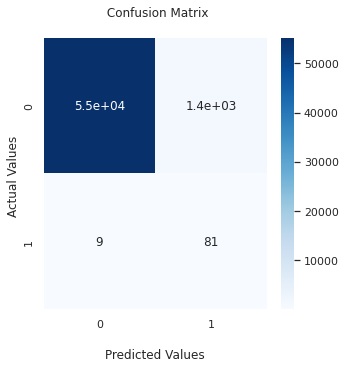

In [138]:
# Displaying Confusion Matrix
cf_matrix = confusion_matrix(y_test,y_pred)
sns.set(rc={'figure.figsize':(5,5)})
ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')

ax.set_title(' Confusion Matrix\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

ax.xaxis.set_ticklabels(['0','1'])
ax.yaxis.set_ticklabels(['0','1'])

In [139]:
#Model Evaluation
accuracy  = metrics.accuracy_score(y_test,y_pred)
recall = metrics.recall_score(y_test,y_pred)
precision = metrics.precision_score(y_test,y_pred)
f1_score = metrics.f1_score(y_test,y_pred)

print(f'Model Accuracy = {100*accuracy:0.3} %' )
print(f'Model recall = {100*recall:0.3} %' )
print(f'Model precision = {100*precision:0.3} %' )
print(f'Model f1_score = {100*f1_score:0.3} %' )

Model Accuracy = 97.5 %
Model recall = 90.0 %
Model precision = 5.47 %
Model f1_score = 10.3 %


Text(0, 0.5, 'True Positive Rate (Sensitivity)')

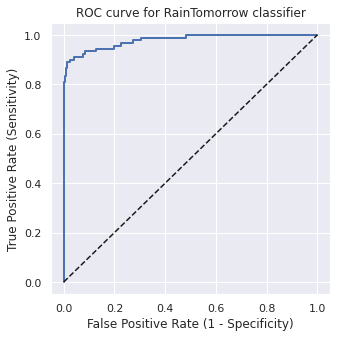

In [140]:
#ROC Curve
y_pred_proba = final_model.predict_proba(x_test)[::,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

plt.plot(fpr, tpr, linewidth=2)
plt.plot([0,1], [0,1], 'k--' )
plt.title('ROC curve for RainTomorrow classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')

In [141]:
# ROC Evaluation
ROC_AUC = metrics.roc_auc_score(y_test,y_pred_proba)
print(f'Model ROC_AUC = {100*ROC_AUC:0.3} %' )

Model ROC_AUC = 97.9 %


## Conclusion


*KNN and SVM algorithms had very low performance.

*The remaining models had relativey good performance.

*The best results were obtained using Random Forest & XGBoost & Ensemble.

*Random Forest Score:

Model Accuracy = 98.1 %

Model recall = 86.7 %

Model precision = 6.76 %

Model f1_score = 12.6 %

*XGBoost Score:

Model Accuracy = 97.5 %

Model recall = 87.8 %

Model precision = 5.23 %

Model f1_score = 9.87 %

*Ensemble Score:

Model Accuracy = 97.5 %

Model recall = 90.0 %

Model precision = 5.47 %

Model f1_score = 10.3 %

----------------------------------------------------------------------------------------------------------------------------------------------------------------